In [247]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from AudioProcessor import log_mel_spectrogram

import os
%matplotlib inline

In [248]:
y = []
x = []

paths = os.listdir('dataset')

print(paths)
classe = 0
for path in paths:
    path_name = os.path.join('./', 'dataset', path)
    for file in os.listdir(path_name):
        filename = os.path.join(path_name, file)
        audio, sr = librosa.load(filename, sr=22000, duration=2)
        processed = log_mel_spectrogram((audio, sr), librosa_like=True)
        x.append(processed)
        y.append(np.array(classe))
        print(filename, processed.shape)
    classe +=1


['nao_neto', 'neto']
./dataset\nao_neto\sample-000001.wav (64, 192)
./dataset\nao_neto\sample-000002.wav (64, 192)
./dataset\nao_neto\sample-000003.wav (64, 192)
./dataset\nao_neto\sample-000004.wav (64, 192)
./dataset\nao_neto\sample-000005.wav (64, 192)
./dataset\nao_neto\sample-000006.wav (64, 192)
./dataset\nao_neto\sample-000007.wav (64, 192)
./dataset\nao_neto\sample-000008.wav (64, 192)
./dataset\nao_neto\sample-000009.wav (64, 192)
./dataset\nao_neto\sample-000010.wav (64, 192)
./dataset\nao_neto\sample-000011.wav (64, 192)
./dataset\nao_neto\sample-000012.wav (64, 192)
./dataset\nao_neto\sample-000013.wav (64, 192)
./dataset\nao_neto\sample-000014.wav (64, 192)
./dataset\nao_neto\sample-000015.wav (64, 192)
./dataset\nao_neto\sample-000016.wav (64, 192)
./dataset\nao_neto\sample-000017.wav (64, 192)
./dataset\nao_neto\sample-000018.wav (64, 192)
./dataset\nao_neto\sample-000019.wav (64, 192)
./dataset\nao_neto\sample-000020.wav (64, 192)
./dataset\nao_neto\sample-000021.wav (6

./dataset\nao_neto\sample-000175.wav (64, 192)
./dataset\nao_neto\sample-000176.wav (64, 192)
./dataset\nao_neto\sample-000177.wav (64, 192)
./dataset\nao_neto\sample-000178.wav (64, 192)
./dataset\nao_neto\sample-000179.wav (64, 192)
./dataset\nao_neto\sample-000180.wav (64, 192)
./dataset\nao_neto\sample-000181.wav (64, 192)
./dataset\nao_neto\sample-000182.wav (64, 192)
./dataset\nao_neto\sample-000183.wav (64, 192)
./dataset\nao_neto\sample-000184.wav (64, 192)
./dataset\nao_neto\sample-000185.wav (64, 192)
./dataset\nao_neto\sample-000186.wav (64, 192)
./dataset\nao_neto\sample-000187.wav (64, 192)
./dataset\nao_neto\sample-000188.wav (64, 192)
./dataset\nao_neto\sample-000189.wav (64, 192)
./dataset\nao_neto\sample-000190.wav (64, 192)
./dataset\nao_neto\sample-000191.wav (64, 192)
./dataset\nao_neto\sample-000192.wav (64, 192)
./dataset\nao_neto\sample-000193.wav (64, 192)
./dataset\nao_neto\sample-000194.wav (64, 192)
./dataset\nao_neto\sample-000195.wav (64, 192)
./dataset\nao

In [249]:
num_classes = len(paths)

In [252]:
len(x)

346

In [253]:
for elem in range(len(x)-1):
    if(x[elem].shape != (64, 192)):
        del x[elem]
        del y[elem]
        print(x[elem].shape)

In [257]:
x[345].shape

(64, 192)

In [258]:
x = np.array(x)

In [259]:
x.shape

(346, 64, 192)

In [260]:
y = np.array(y)

In [261]:
y.shape

(346,)

In [262]:
type(x)

numpy.ndarray

In [263]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Input, Dropout, BatchNormalization, Convolution2D, MaxPool2D, GlobalMaxPool2D, Activation, Flatten, Reshape, ZeroPadding2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [264]:
y_c = to_categorical(y, num_classes)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(
    x.reshape(*x.shape, 1), y_c, test_size=0.33, random_state=22)

In [266]:
model = Sequential()

model.add(ZeroPadding2D(padding=(1,1),input_shape = (X_train.shape[1],X_train.shape[2],1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (4, 7)))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))

model.add(MaxPooling2D((3,3)))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (4, 7)))

model.add(MaxPooling2D((3,3)))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (4, 7)))

model.add(MaxPooling2D((3,3)))

model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))

model.add(GlobalAveragePooling2D())


model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_107 (ZeroPadd (None, 66, 194, 1)        0         
_________________________________________________________________
batch_normalization_111 (Bat (None, 66, 194, 1)        4         
_________________________________________________________________
activation_123 (Activation)  (None, 66, 194, 1)        0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 63, 188, 32)       928       
_________________________________________________________________
zero_padding2d_108 (ZeroPadd (None, 65, 190, 32)       0         
_________________________________________________________________
batch_normalization_112 (Bat (None, 65, 190, 32)       128       
_________________________________________________________________
activation_124 (Activation)  (None, 65, 190, 32)     

In [268]:

history = model.fit(X_train, y_train, validation_split=0.3, batch_size= 32, epochs=400,
    callbacks=[
            EarlyStopping(patience=100, monitor="val_loss", verbose=1),
                          CSVLogger('voice_recognition.log')
])

Train on 161 samples, validate on 70 samples
Epoch 1/400
161/161 [==============================] - 4s 24ms/step - loss: 0.5117 - acc: 0.8323 - val_loss: 0.8511 - val_acc: 0.9429
Epoch 2/400
161/161 [==============================] - 0s 2ms/step - loss: 0.4860 - acc: 0.6832 - val_loss: 0.9214 - val_acc: 0.9429
Epoch 3/400
161/161 [==============================] - 0s 2ms/step - loss: 0.3658 - acc: 0.9193 - val_loss: 0.9423 - val_acc: 0.9429
Epoch 4/400
161/161 [==============================] - 0s 2ms/step - loss: 0.2864 - acc: 0.8571 - val_loss: 0.9201 - val_acc: 0.9429
Epoch 5/400
161/161 [==============================] - 0s 2ms/step - loss: 0.3304 - acc: 0.9193 - val_loss: 0.7188 - val_acc: 0.9429
Epoch 6/400
161/161 [==============================] - 0s 2ms/step - loss: 0.2449 - acc: 0.9193 - val_loss: 0.5270 - val_acc: 0.9429
Epoch 7/400
161/161 [==============================] - 0s 2ms/step - loss: 0.2118 - acc: 0.9193 - val_loss: 0.4609 - val_acc: 0.9429
Epoch 8/400
161/161 [==

Epoch 118/400
161/161 [==============================] - 0s 2ms/step - loss: 1.4068e-06 - acc: 1.0000 - val_loss: 1.7138e-05 - val_acc: 1.0000
Epoch 119/400
161/161 [==============================] - 0s 2ms/step - loss: 2.0342e-05 - acc: 1.0000 - val_loss: 1.8115e-05 - val_acc: 1.0000
Epoch 120/400
161/161 [==============================] - 0s 2ms/step - loss: 5.0782e-06 - acc: 1.0000 - val_loss: 2.2717e-05 - val_acc: 1.0000
Epoch 121/400
161/161 [==============================] - 0s 2ms/step - loss: 1.3702e-06 - acc: 1.0000 - val_loss: 1.8762e-05 - val_acc: 1.0000
Epoch 122/400
161/161 [==============================] - 0s 2ms/step - loss: 2.6763e-06 - acc: 1.0000 - val_loss: 2.1538e-05 - val_acc: 1.0000
Epoch 123/400
161/161 [==============================] - 0s 2ms/step - loss: 1.4827e-06 - acc: 1.0000 - val_loss: 1.9737e-05 - val_acc: 1.0000
Epoch 124/400
161/161 [==============================] - 0s 2ms/step - loss: 1.6119e-06 - acc: 1.0000 - val_loss: 2.1989e-05 - val_acc: 1.0000

161/161 [==============================] - 0s 2ms/step - loss: 0.1001 - acc: 0.9938 - val_loss: 1.7789e-06 - val_acc: 1.0000
Epoch 233/400
161/161 [==============================] - 0s 2ms/step - loss: 4.9868e-07 - acc: 1.0000 - val_loss: 2.0744e-06 - val_acc: 1.0000
Epoch 234/400
161/161 [==============================] - 0s 2ms/step - loss: 1.0154e-05 - acc: 1.0000 - val_loss: 1.7806e-06 - val_acc: 1.0000
Epoch 235/400
161/161 [==============================] - 0s 2ms/step - loss: 9.5072e-07 - acc: 1.0000 - val_loss: 1.8972e-06 - val_acc: 1.0000
Epoch 236/400
161/161 [==============================] - 0s 2ms/step - loss: 5.9309e-07 - acc: 1.0000 - val_loss: 1.6775e-06 - val_acc: 1.0000
Epoch 237/400
161/161 [==============================] - 0s 2ms/step - loss: 3.9317e-07 - acc: 1.0000 - val_loss: 1.4944e-06 - val_acc: 1.0000
Epoch 238/400
161/161 [==============================] - 0s 2ms/step - loss: 0.1001 - acc: 0.9938 - val_loss: 1.0346e-06 - val_acc: 1.0000
Epoch 239/400
161/161

161/161 [==============================] - 0s 2ms/step - loss: 2.4515e-06 - acc: 1.0000 - val_loss: 5.6795e-07 - val_acc: 1.0000
Epoch 347/400
161/161 [==============================] - 0s 2ms/step - loss: 8.4966e-07 - acc: 1.0000 - val_loss: 6.2841e-07 - val_acc: 1.0000
Epoch 348/400
161/161 [==============================] - 0s 2ms/step - loss: 1.8363e-07 - acc: 1.0000 - val_loss: 6.1053e-07 - val_acc: 1.0000
Epoch 349/400
161/161 [==============================] - 0s 2ms/step - loss: 2.4841e-07 - acc: 1.0000 - val_loss: 7.1527e-07 - val_acc: 1.0000
Epoch 350/400
161/161 [==============================] - 0s 2ms/step - loss: 3.4689e-07 - acc: 1.0000 - val_loss: 6.2841e-07 - val_acc: 1.0000
Epoch 351/400
161/161 [==============================] - 0s 2ms/step - loss: 2.8136e-07 - acc: 1.0000 - val_loss: 7.6806e-07 - val_acc: 1.0000
Epoch 352/400
161/161 [==============================] - 0s 2ms/step - loss: 2.2805e-07 - acc: 1.0000 - val_loss: 6.0627e-07 - val_acc: 1.0000
Epoch 353/400

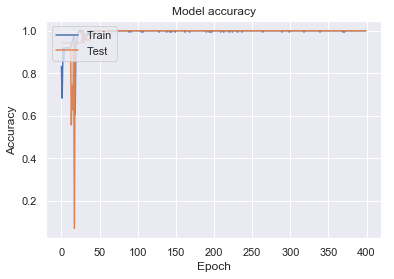

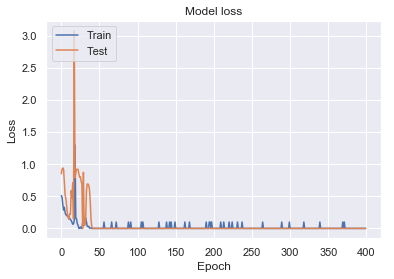

In [269]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [270]:
e = model.evaluate(X_test, y_test)

115/115 [==============================] - 0s 685us/step


In [271]:
e

[0.14017056675892128, 0.991304347826087]

In [272]:
y_pred = model.predict(X_test)

In [273]:
from sklearn.metrics import confusion_matrix, classification_report

In [274]:
y_p = np.argmax(y_pred, -1)

In [275]:
y_p

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [276]:
y_t = np.argmax(y_test, -1)

In [277]:
y_t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [278]:
import seaborn as sns

sns.set()

In [279]:
confusion_matrix(y_t, y_p)

array([[99,  0],
       [ 1, 15]], dtype=int64)

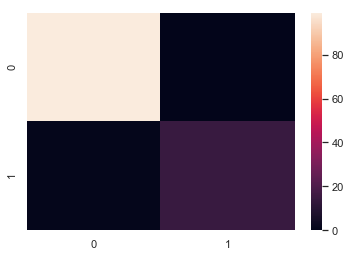

In [281]:
sns.heatmap(confusion_matrix(y_t, y_p))

In [282]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.94      0.97        16

   micro avg       0.99      0.99      0.99       115
   macro avg       0.99      0.97      0.98       115
weighted avg       0.99      0.99      0.99       115

